In [1]:
import os
import json
import glob
import numpy as np

import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
file_list = glob.glob(os.path.join('..', 'point', '*.json'))
file_list = sorted(file_list)
file_length = len(file_list)
print(f'Number of files: {file_length}')

Number of files: 8029


In [3]:
nn = 1

file_pos = file_list[nn]
pos_la = file_pos.split('/')[-1].split('_')[1]
pos_lo = file_pos.split('/')[-1].split('_')[2]
print(f'LAT pos: {pos_la}, LON pos: {pos_lo}')

with open(file_list[nn], 'r') as f:
    data = json.load(f)

LAT pos: 0, LON pos: 10


In [4]:
mev_d_array = np.fromstring(data['mev_d'].strip('[]'), sep=' ')
mev_s_array = np.fromstring(data['mev_s'].strip('[]'), sep=' ')
Tr = np.fromstring(data['Tr'].strip('[]'), sep=' ')
beta = data['beta']

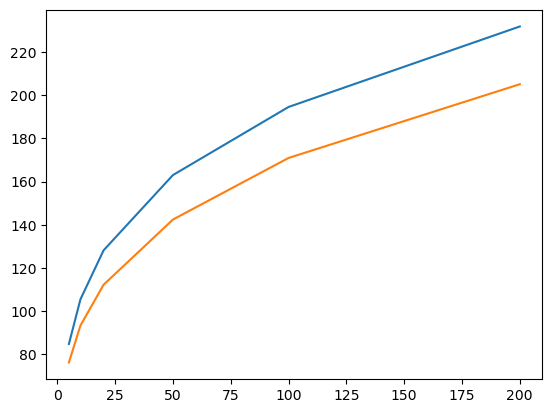

In [5]:
plt.plot(Tr, mev_d_array)
plt.plot(Tr, mev_s_array)

## LOAD CHIRPS

In [6]:
SAT = xr.open_dataset('/media/arturo/T9/Data/Italy/Satellite/CHIRPS/1dy/CHIRPS_Italy_1dy_1981_01_01_2024_06_30.nc')
lat = SAT.lat.values
lon = SAT.lon.values
lon2d, lat2d = np.meshgrid(lon, lat)

lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

PRE_data = SAT.sel(lat=slice(lat_min-1.5, lat_max+1.5), lon=slice(lon_min-1.5, lon_max+1.5))
print(np.shape(PRE_data.PRE.values))

del SAT

(15887, 240, 260)


In [20]:
count = 0
for i in range(len(lat)):
    for j in range(len(lon)):
        tmp = PRE_data['PRE'].values[:,i,j]
        num_nan = np.isnan(tmp).sum()
        if num_nan != 15887:
            count = count + 1
print(f'Number of points with data: {count}')

Number of points with data: 32164


In [21]:
BETA_2d = np.zeros([len(lat),len(lon)])
GAMMA_2d = np.zeros([len(lat),len(lon)])

for nn in range(file_length):
    with open(file_list[nn], 'r') as f:
        tmp = json.load(f)
    beta_ = tmp['beta']
    gamma_ = tmp['gam_d']

    lat_pos = np.where(lat==float(tmp['clat']))[0][0]
    lon_pos = np.where(lon==float(tmp['clon']))[0][0]

    BETA_2d[lat_pos, lon_pos] = beta_
    GAMMA_2d[lat_pos, lon_pos] = gamma_

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


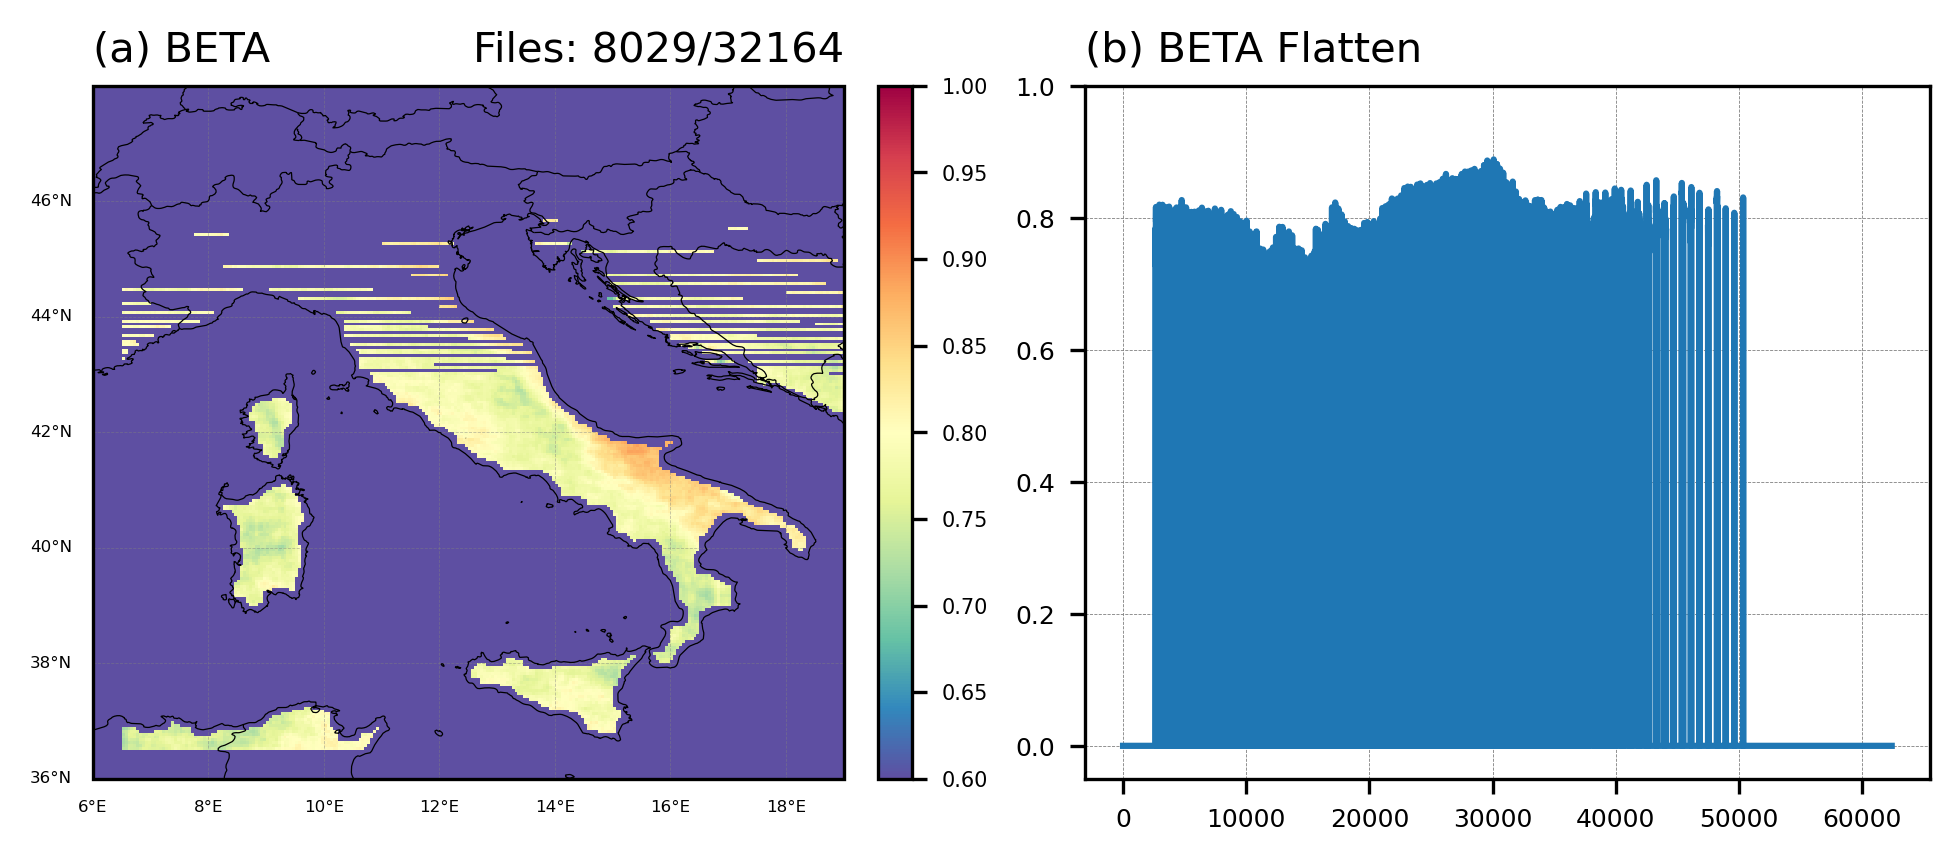

In [23]:
levels = np.arange(0.5,1.1,0.1)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,2)

# =============================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.pcolormesh(lon2d, lat2d, BETA_2d, vmin=0.6, vmax=1, cmap=cmap)

ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_title(f'(a) BETA',loc='left',fontsize=10)
ax1.set_title(f'Files: {file_length}/{count}',loc='right',fontsize=10)

cbar = plt.colorbar(a1, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# =============================================
ax1 = plt.subplot(gs[0, 1])
ax1.plot(BETA_2d.flatten())
ax1.set_ylim(-0.05,1)
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_title(f'(b) BETA Flatten',loc='left',fontsize=10)
ax1.grid(linewidth=0.2, linestyle='--', color='gray')

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


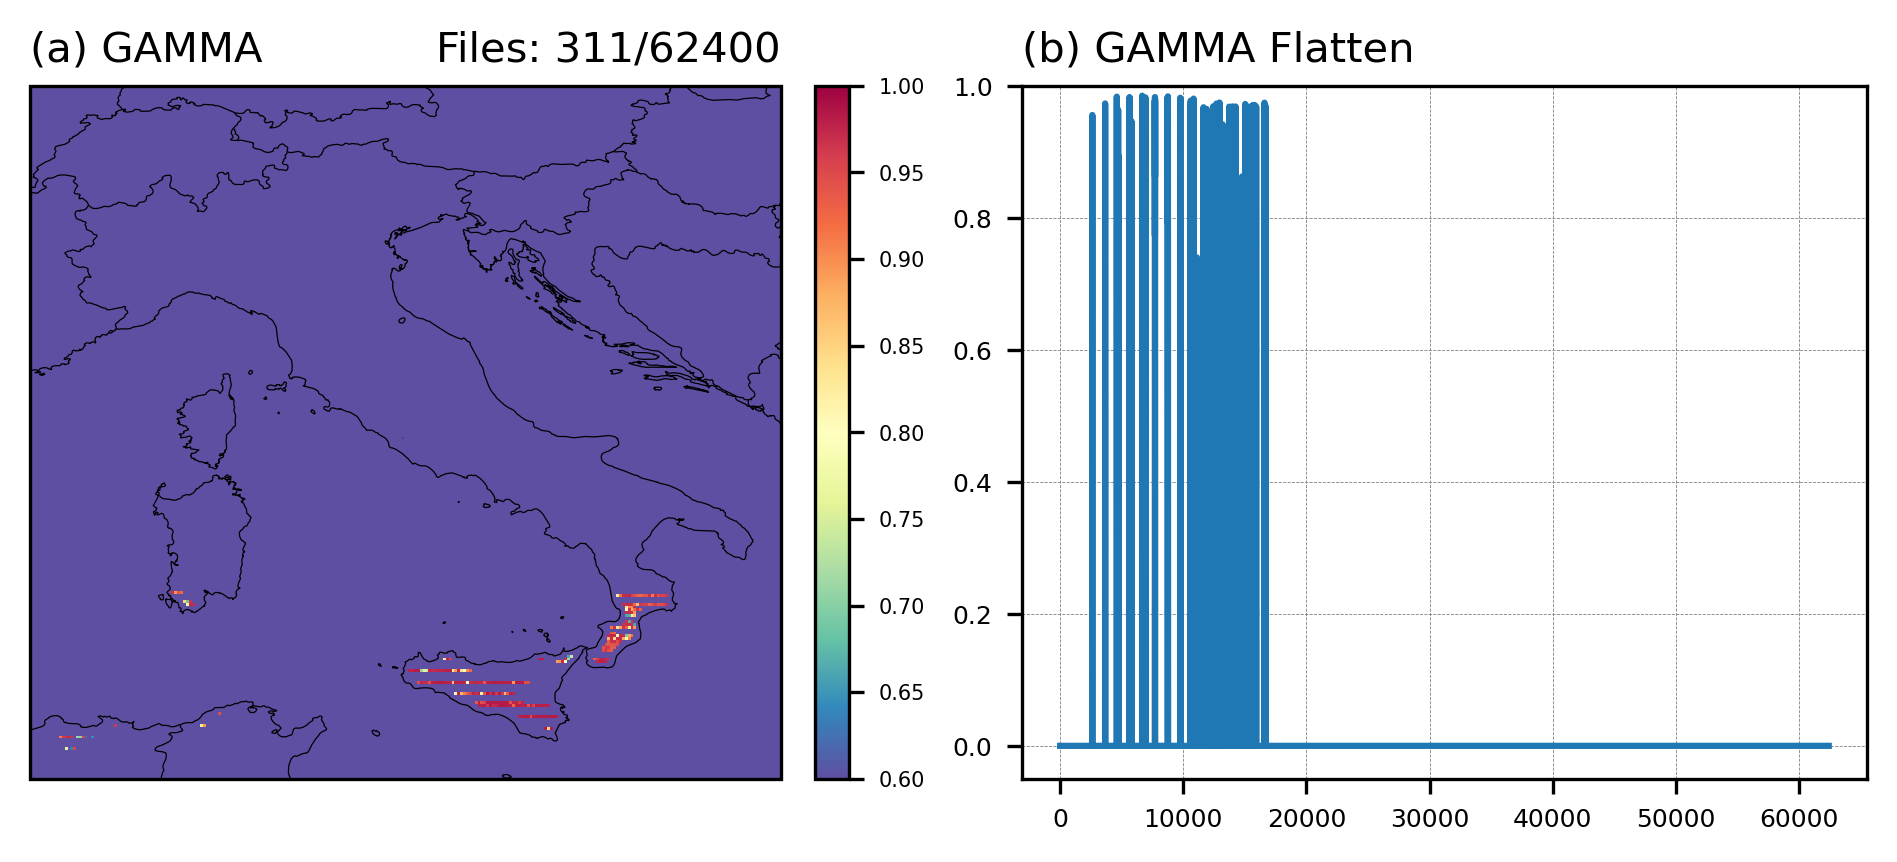

In [9]:
levels = np.arange(0.5,1.1,0.1)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,2)

# =============================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.pcolormesh(lon2d, lat2d, GAMMA_2d, vmin=0.6, vmax=1, cmap=cmap)

ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_title(f'(a) GAMMA',loc='left',fontsize=10)
ax1.set_title(f'Files: {file_length}/{len(GAMMA_2d.flatten())}',loc='right',fontsize=10)

cbar = plt.colorbar(a1, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=5)

# =============================================
ax1 = plt.subplot(gs[0, 1])
ax1.plot(GAMMA_2d.flatten())
ax1.set_ylim(-0.05,1)
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_title(f'(b) GAMMA Flatten',loc='left',fontsize=10)
ax1.grid(linewidth=0.2, linestyle='--', color='gray')

Text(1.0, 1.0, 'Files: 311/62400')

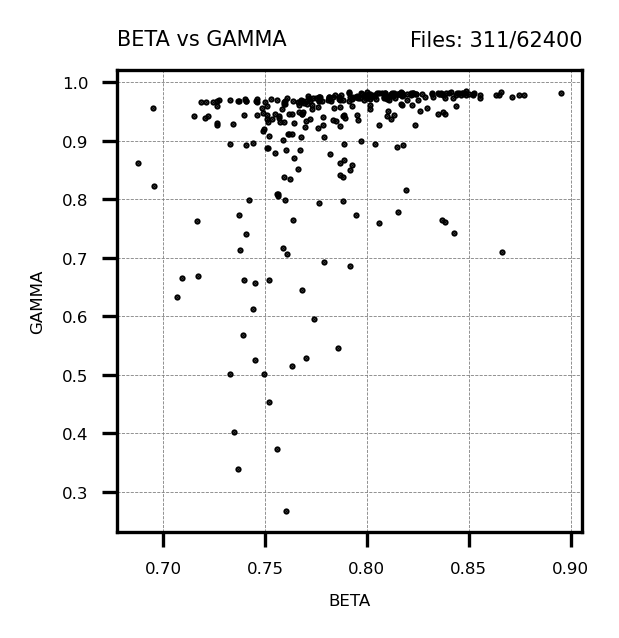

In [10]:
# one mask for values different from zero for BETA and GAMMA
mask = (BETA_2d != 0) & (GAMMA_2d != 0)
BETA_2d_masked = BETA_2d[mask]
GAMMA_2d_masked = GAMMA_2d[mask]

fig = plt.figure(figsize=(2,2),dpi=300)
gs = gridspec.GridSpec(1,1)

# =============================================
ax1 = plt.subplot(gs[0, 0])
ax1.plot(BETA_2d_masked,GAMMA_2d_masked, '.', markersize=1, color='black')
ax1.tick_params(axis='both', which='major', labelsize=4)
ax1.grid(linewidth=0.2, linestyle='--', color='gray')
ax1.set_xlabel('BETA', fontsize=4)
ax1.set_ylabel('GAMMA', fontsize=4)
ax1.set_title(f'BETA vs GAMMA', fontsize=5, loc='left')
ax1.set_title(f'Files: {file_length}/{len(GAMMA_2d.flatten())}',loc='right',fontsize=5)

In [11]:
np.where(lon==16.324997)

(array([206]),)